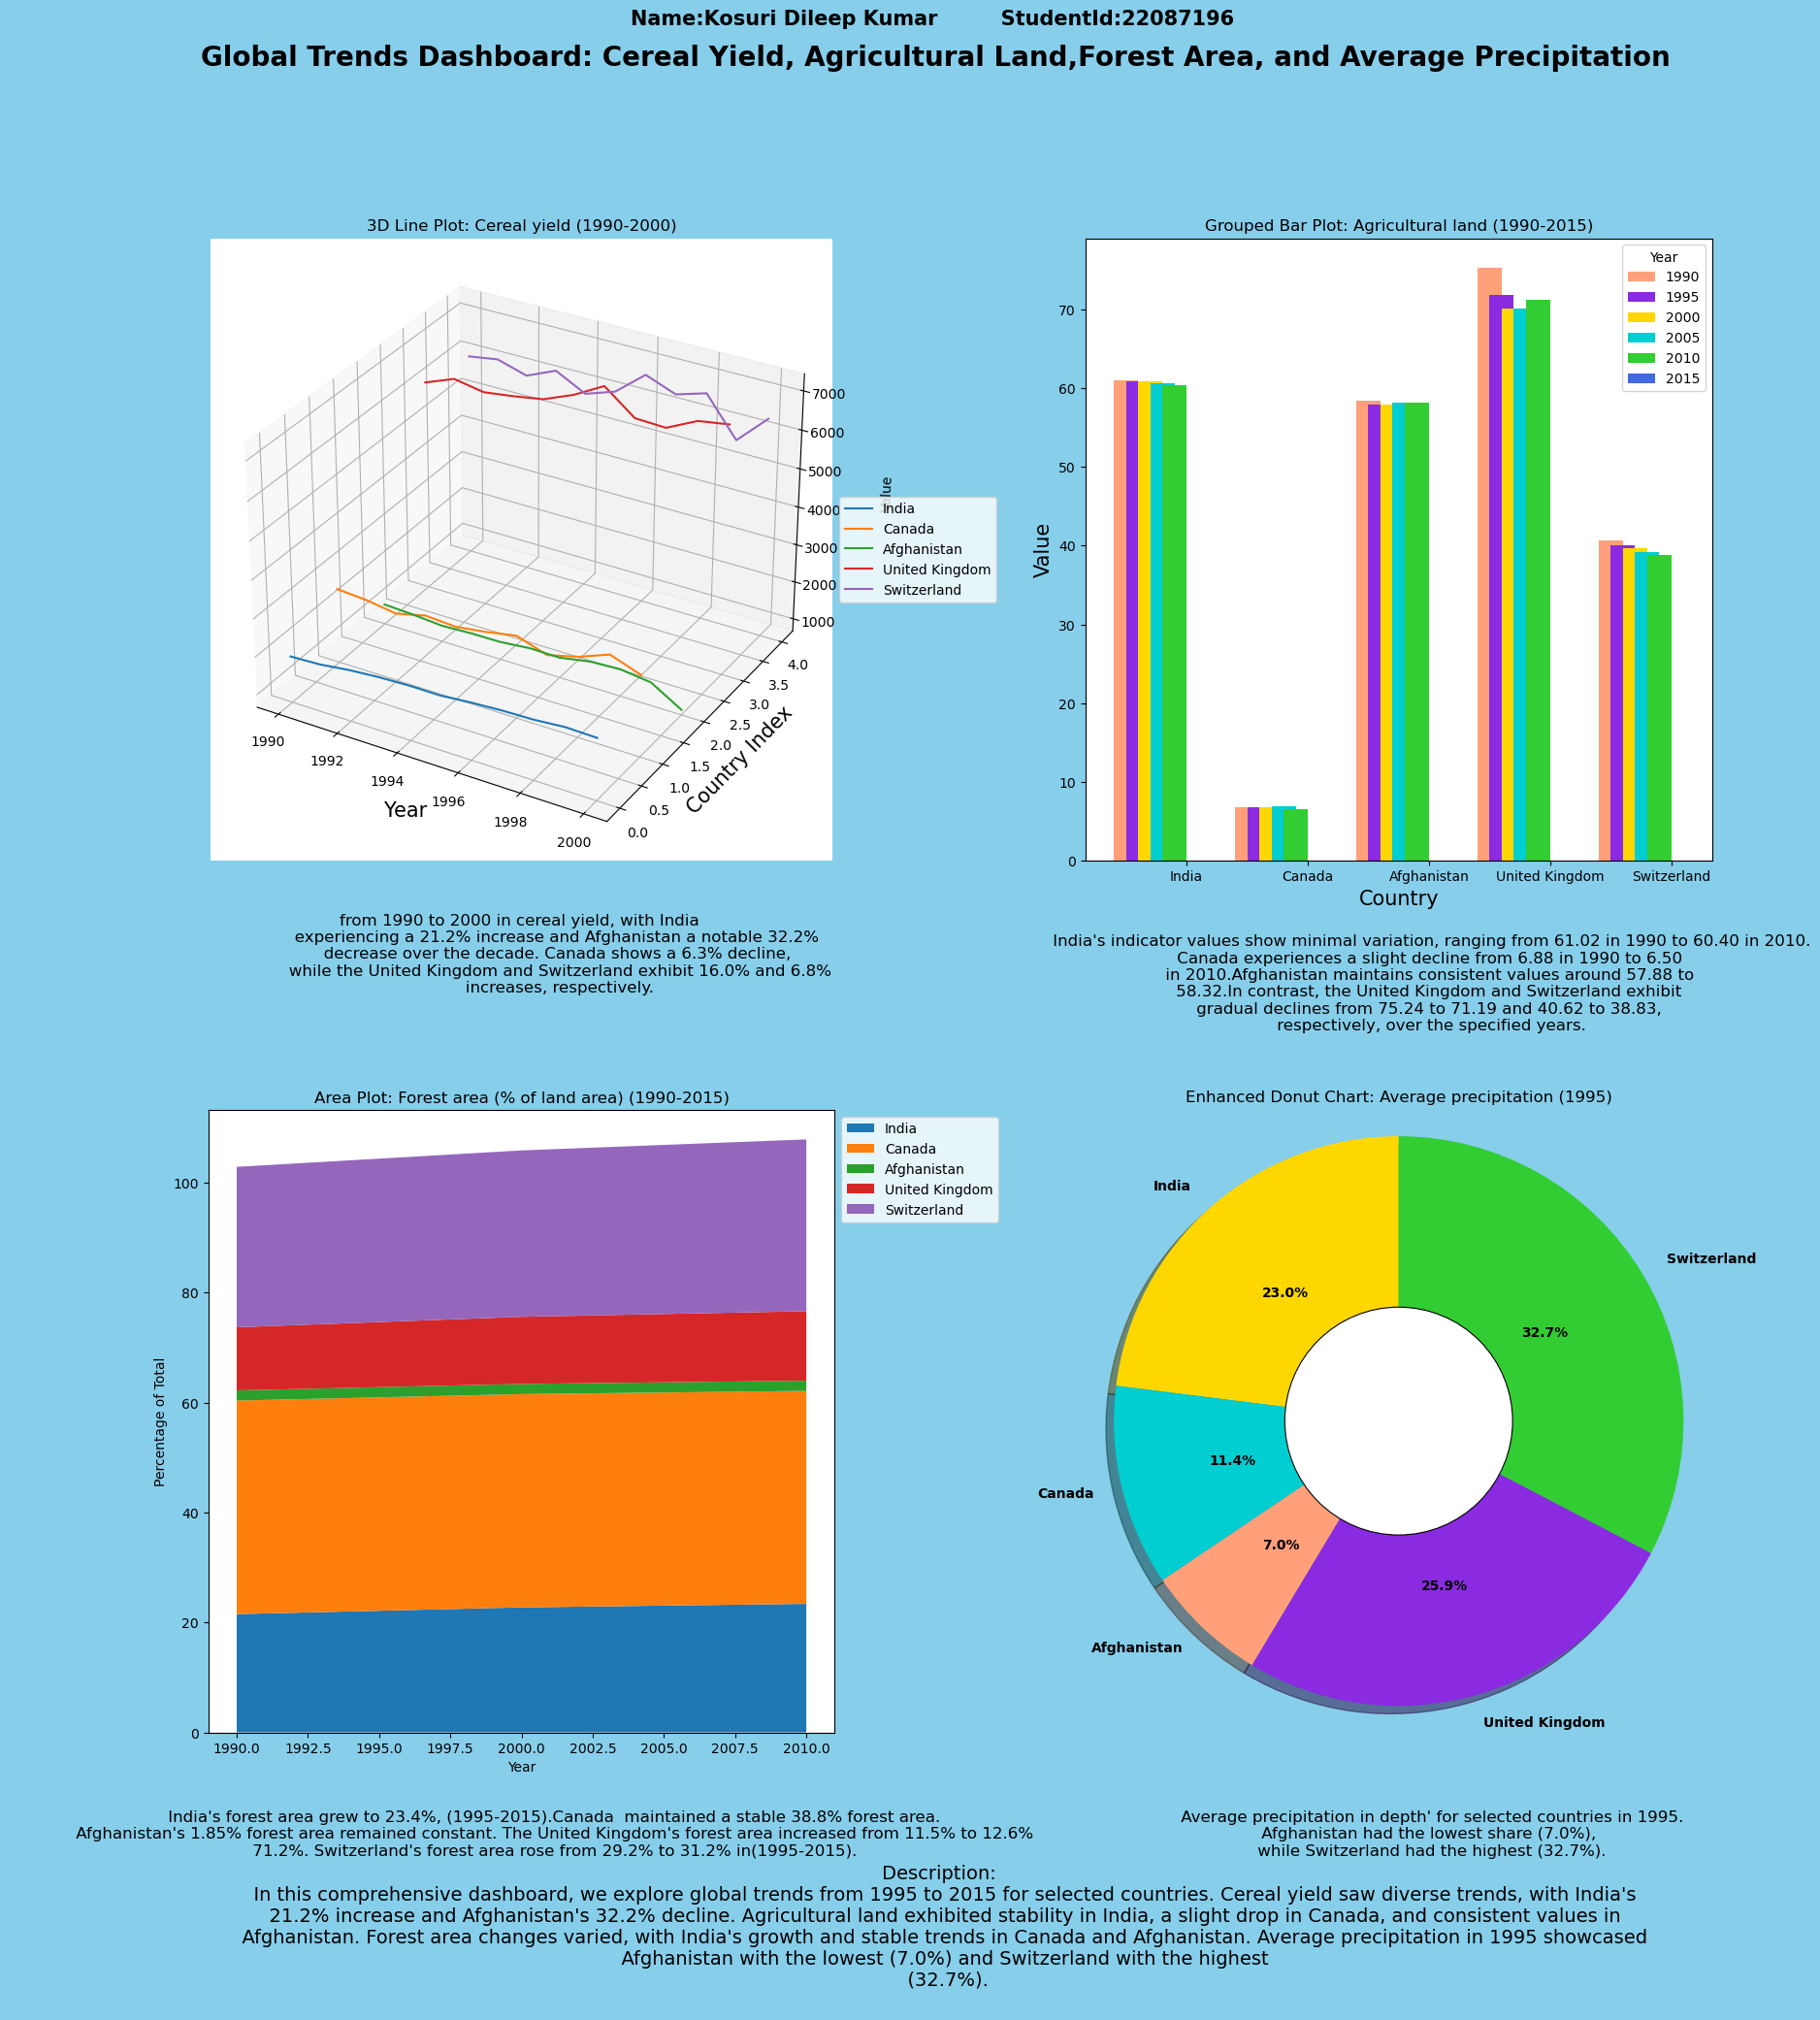

In [3]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec as gsp
from matplotlib.gridspec import GridSpec


def read_data(file_path):
    # Read data from CSV file
    with open(file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        # Return the entire data
        return list(csv_reader)


def plot_3d_line_visualization(data, indicator_to_plot, start_year, end_year,
                               countries_to_plot, ax=None):
    # If ax is not provided, create a new 3D plot
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    # Create a dictionary to store data for each country
    country_data = {country: {'years': [], 'data': []}
                    for country in countries_to_plot}

    # Extract years and data for the chosen indicator within the specified
    # range
    for i, row in enumerate(data):
        if row['Indicator Name'] == indicator_to_plot and \
                start_year <= int(row['Year']) <= end_year:
            for j, country in enumerate(countries_to_plot):
                country_data[country]['years'].append(int(row['Year']))
                # Assuming the column for the country is the same as the
                # country name
                value = float(row[country])
                country_data[country]['data'].append(value)

    # Plot the data for each country in 3D space
    for j, country in enumerate(countries_to_plot):
        ax.plot(country_data[country]['years'],
                [j]*len(country_data[country]['years']),
                country_data[country]['data'], label=f'{country}')

    # Add labels and title
    ax.set_xlabel('Year', fontsize='15')
    ax.set_ylabel('Country Index', fontsize='15')
    ax.set_zlabel('Value', labelpad=20)  # Set z-label with extra padding
    ax.set_title('3D Line Plot for {}'.format(indicator_to_plot))

    # Add legend to the right side
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Return the axis for potential further customization
    return ax


def plot_bar_visualization(data, indicator_to_plot, selected_years,
                           countries_to_plot, ax=None):
    # If ax is not provided, create a new plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    # Create a dictionary to store data for each country and year
    country_year_data = {country: {year: []
                                   for year in selected_years} for
                         country in countries_to_plot}

    # Extract data for the chosen indicator and years
    for row in data:
        if row['Indicator Name'] == indicator_to_plot and int(row['Year']) in \
                selected_years:
            year = int(row['Year'])
            for country in countries_to_plot:
                country_year_data[country][year].append(float(row[country]))

    # Plot the data as a grouped bar chart with new light colors
    bar_width = 0.2  # Adjust the width of the bars

    # Define the positions for each group of bars
    positions = np.arange(len(countries_to_plot)) + 0.5 * \
        (len(selected_years) - 1) * bar_width

    # Define new light colors
    new_colors = ['#FFA07A', '#8A2BE2', '#FFD700',
                  '#00CED1', '#32CD32', '#4169E1']

    # Ensure that the length of new_colors is at least the number of
    # selected years
    new_colors = new_colors[:len(selected_years)]

    for i, year in enumerate(selected_years):
        # Adjust the positions for each year
        year_positions = positions - 0.5 * \
            (len(selected_years) - 1 - i) * bar_width
        values = np.array([country_year_data[country][year]
                          for country in countries_to_plot])

        ax.bar(year_positions, np.sum(values, axis=1),
               width=bar_width, label=str(year), color=new_colors[i])

    # Add labels and title
    ax.set_xlabel('Country', fontsize='15')
    ax.set_ylabel('Value', fontsize='15')
    ax.set_title(
        'Grouped Bar Plot for {} (from 1990 to 2010)'.format(
            indicator_to_plot))

    # Set x-axis ticks and labels
    ax.set_xticks(positions)
    ax.set_xticklabels(countries_to_plot)

    # Add legend
    ax.legend(title='Year')

    # Return the axis for potential further customization
    return ax


def donut_chart_visuvalization(data, indicator_to_plot, year, ax=None,
                               hole_size=0.4, explode=None):
    # If ax is not provided, create a new plot
    if ax is None:
        fig, ax = plt.subplots()

    # Create a dictionary to store data for each country
    country_data = {}

    # Extract data for the chosen indicator and year
    for row in data:
        if row['Indicator Name'] == indicator_to_plot and \
                int(row['Year']) == year:
            for country in row.keys():
                if country != 'Year' and country != 'Indicator Name' and \
                        row[country] != '':
                    country_data[country] = float(row[country])

    lighter_colors = ['#FFD700', '#00CED1', '#FFA07A', '#8A2BE2', '#32CD32']

    # Extract values and labels from the dictionary
    labels = list(country_data.keys())
    values = list(country_data.values())

    # Explode slices if specified
    if explode:
        explode = [0.1 if country in explode else 0 for country in labels]

    # Plot the data as a pie chart with additional styles
    ax.pie(values, labels=labels, colors=lighter_colors, autopct='%1.1f%%',
           startangle=90,
           shadow=True, explode=explode,
           textprops={'fontsize': 10, 'fontweight': 'bold'})

    # Use facecolor instead of color for the circle
    centre_circle = plt.Circle(
        (0, 0), hole_size, facecolor='white', edgecolor='black', linewidth=0.8)
    ax.add_artist(centre_circle)

    # Equal aspect ratio ensures that the pie chart is circular
    ax.axis('equal')

    # Add title
    ax.set_title('Enhanced Donut Chart for {} in {}'.format(
        indicator_to_plot, year))

    # Return the axis for potential further customization
    return ax


def scatter_plot_visuvalization(data, indicator_x, indicator_y, selected_years,
                                countries_to_plot, ax=None):
    # If ax is not provided, create a new plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    # Create a dictionary to store data for each country and year
    country_year_data_x = {country: {
        year: None for year in selected_years} for country in
        countries_to_plot}
    country_year_data_y = {country: {
        year: None for year in selected_years} for country in
        countries_to_plot}

    # Extract data for the chosen indicators and years
    for row in data:
        if row['Indicator Name'] == indicator_x and int(row['Year']) in \
                selected_years:
            year = int(row['Year'])
            for country in countries_to_plot:
                country_year_data_x[country][year] = float(row[country])

        if row['Indicator Name'] == indicator_y and int(row['Year']) in \
                selected_years:
            year = int(row['Year'])
            for country in countries_to_plot:
                country_year_data_y[country][year] = float(row[country])

    # Plot the data as a scatter plot with larger dot sizes
    for country in countries_to_plot:
        values_x = [country_year_data_x[country][year]
                    for year in selected_years]
        values_y = [country_year_data_y[country][year]
                    for year in selected_years]
        ax.scatter(values_x, values_y, label=country, alpha=0.7,
                   edgecolors='w', linewidth=0.5, s=100)

    # Add labels and title
    ax.set_xlabel(indicator_x, fontsize='15')
    ax.set_ylabel(indicator_y, fontsize='15')
    ax.set_title(
        f'Scatter Plot for {indicator_x} vs {indicator_y} from 1995 to 2015')

    # Add legend
    ax.legend()

    # Customize grid
    ax.grid(True, linestyle='--', alpha=0.5)

    return ax


def area_plot_visualization(data, indicator_to_plot, start_year, end_year, countries_to_plot, ax=None):
    # If ax is not provided, create a new plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    # Filter data for the chosen indicator and years
    filtered_data = [row for row in data if row['Indicator Name'] ==
                     indicator_to_plot and start_year <= int(row['Year']) <= end_year]

    # Create a dictionary to store data for each source
    sources_data = {source: {'years': [], 'data': []} for source in data[0].keys(
    ) if source not in ['Year', 'Indicator Name'] and source in countries_to_plot}

    # Extract years and data for each source
    for row in filtered_data:
        for source in sources_data.keys():
            sources_data[source]['years'].append(int(row['Year']))
            sources_data[source]['data'].append(float(row[source]))

    # Create a list of years
    years = list(set(year for source_data in sources_data.values()
                 for year in source_data['years']))

    # Plot the data as a stacked area plot
    ax.stackplot(years,
                 *[sources_data[c]['data'] for c in countries_to_plot],
                 labels=countries_to_plot)

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of Total')
    ax.set_title(
        f'Stacked Area Plot for {indicator_to_plot} ({start_year} to {end_year})')

    # Add legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # If ax was not provided, show the plot
    if not ax:
        plt.show()

    # Return the axis for potential further customization
    return ax


def create_area_plot(data, indicator_to_plot, start_year, end_year, countries_to_plot, ax=None):
    # If ax is not provided, create a new plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    # Filter data for the chosen indicator and years
    filtered_data = [row for row in data if row['Indicator Name'] ==
                     indicator_to_plot and start_year <= int(row['Year']) <= end_year]

    # Create a dictionary to store data for each source
    sources_data = {source: {'years': [], 'data': []} for source in data[0].keys(
    ) if source not in ['Year', 'Indicator Name'] and source in countries_to_plot}

    # Extract years and data for each source
    for row in filtered_data:
        for source in sources_data.keys():
            sources_data[source]['years'].append(int(row['Year']))
            sources_data[source]['data'].append(float(row[source]))

    # Create a list of years
    years = list(set(year for source_data in sources_data.values()
                 for year in source_data['years']))

    # Plot the data as a stacked area plot
    ax.stackplot(years,
                 *[sources_data[c]['data'] for c in countries_to_plot],
                 labels=countries_to_plot)

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage of Total')
    ax.set_title(
        f'Stacked Area Plot for {indicator_to_plot} ({start_year} to {end_year})')

    # Add legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


    # Return the axis for potential further customization
    return ax


def create_dashboard(data, countries):
    # Create a 2x2 grid for subplots
    fig = plt.figure(figsize=(20, 20), facecolor='skyblue')
    fig.text(0.5, 0.99, "Name:Kosuri Dileep Kumar         StudentId:22087196 ",
             ha="center", fontweight='bold', fontsize=15)
    gs = GridSpec(2, 2, hspace=0.4, wspace=0.4)

    # First Plot (3D Line Plot)
    ax1 = fig.add_subplot(gs[0, 0], projection='3d')
    plot_3d_line_visualization(data, 'Cereal yield (kg per hectare)',
                               1990, 2000, countries, ax=ax1)
    ax1.set_title('3D Line Plot: Cereal yield (1990-2000)')
    ax1.text2D(0.5, -0.15,  """from 1990 to 2000 in cereal yield, with India 
               experiencing a 21.2% increase and Afghanistan a notable 32.2% 
               decrease over the decade. Canada shows a 6.3% decline, 
               while the United Kingdom and Switzerland exhibit 16.0% and 6.8%
               increases, respectively.""", ha='center', va='center',
               transform=ax1.transAxes, fontsize=12, color='black')

    # Second Plot (Grouped Bar Plot)
    ax2 = fig.add_subplot(gs[0, 1])
    plot_bar_visualization(data, 'Agricultural land (% of land area)',
                           [1990, 1995, 2000, 2005, 2010, 2015],
                           countries, ax=ax2)
    ax2.set_title('Grouped Bar Plot: Agricultural land (1990-2015)')
    ax2.text(0.5, -0.17, """
           
             India's indicator values show minimal variation, ranging from 61.02 in 1990 to 60.40 in 2010.
             Canada experiences a slight decline from 6.88 in 1990 to 6.50 
             in 2010.Afghanistan maintains consistent values around 57.88 to 
             58.32.In contrast, the United Kingdom and Switzerland exhibit 
             gradual declines from 75.24 to 71.19 and 40.62 to 38.83, 
             respectively, over the specified years.""", ha='center',
             va='center', transform=ax2.transAxes, fontsize=12, color='black')

    # Third Plot (Scatter Plot)
    ax3 = fig.add_subplot(gs[1, 0])
    area_plot_visualization(
        data, 'Forest area (% of land area)', 1990, 2015, countries, ax=ax3)

    ax3.set_title('Area Plot: Forest area (% of land area) (1990-2015)')
    ax3.text(0.5, -0.15, """
             India's forest area grew to 23.4%, (1995-2015).Canada  maintained a stable 38.8% forest area.
             Afghanistan's 1.85% forest area remained constant. The United Kingdom's forest area increased from 11.5% to 12.6%
             71.2%. Switzerland's forest area rose from 29.2% to 31.2% in(1995-2015).""",
             ha='center', va='center', transform=ax3.transAxes,
             fontsize=12, color='black')

    # Fourth Plot (Donut Chart)
    ax4 = fig.add_subplot(gs[1, 1])
    donut_chart_visuvalization(data,
                               'Average precipitation in depth (mm per year)',
                               1995, ax=ax4)
    ax4.set_title('Enhanced Donut Chart: Average precipitation (1995)')
    ax4.text(0.5, -0.15,  """
             Average precipitation in depth' for selected countries in 1995.
             Afghanistan had the lowest share (7.0%), 
             while Switzerland had the highest (32.7%).""",
             ha='center', va='center', transform=ax4.transAxes,
             fontsize=12, color='black')

    conclusion_text = """\n Description:
    In this comprehensive dashboard, we explore global trends from 1995 to 2015 for selected countries. Cereal yield saw diverse trends, with India's 
    21.2% increase and Afghanistan's 32.2% decline. Agricultural land exhibited stability in India, a slight drop in Canada, and consistent values in 
    Afghanistan. Forest area changes varied, with India's growth and stable trends in Canada and Afghanistan. Average precipitation in 1995 showcased 
    Afghanistan with the lowest (7.0%) and Switzerland with the highest 
    (32.7%).
    """
    fig.text(0.5, 0.01, conclusion_text, ha='center', fontsize=14, va='center')

    fig.suptitle('Global Trends Dashboard: Cereal Yield, Agricultural Land,Forest Area, and Average Precipitation',
                 fontweight='bold', fontsize=20)

    plt.show()


def main():
    file_path = "caflanddata.csv"
    data = read_data(file_path)

    countries = ['India', 'Canada', 'Afghanistan',
                 'United Kingdom', 'Switzerland']

    # Read data from CSV file
    data = read_data(file_path)
    create_dashboard(data, countries)


if __name__ == '__main__':
    main()
